# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 20th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

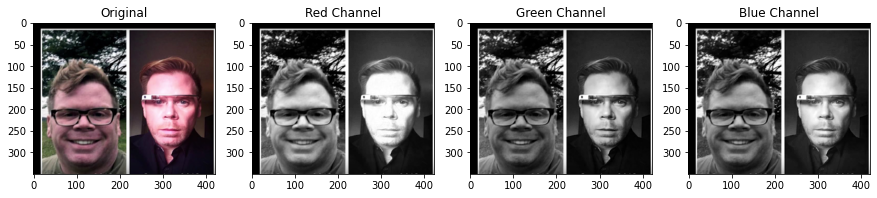

In [1]:
import numpy as np #usefull for matrices
from skimage import io #loading and saving
from matplotlib import pyplot as plt #ploating images

%matplotlib inline

#your solution
face = io.imread("images/face.png")
red_channel = face[:,:,0]
green_channel = face[:,:,1]
blue_channel = face[:,:,2]


fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.imshow(face, cmap='gray')
plt.title('Original')

fig.add_subplot(1,4,2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

fig.add_subplot(1,4,3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

fig.add_subplot(1,4,4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.show()

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

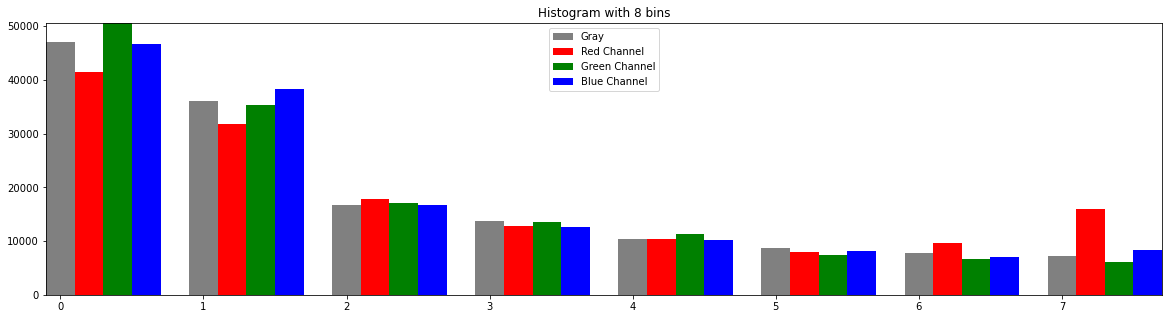

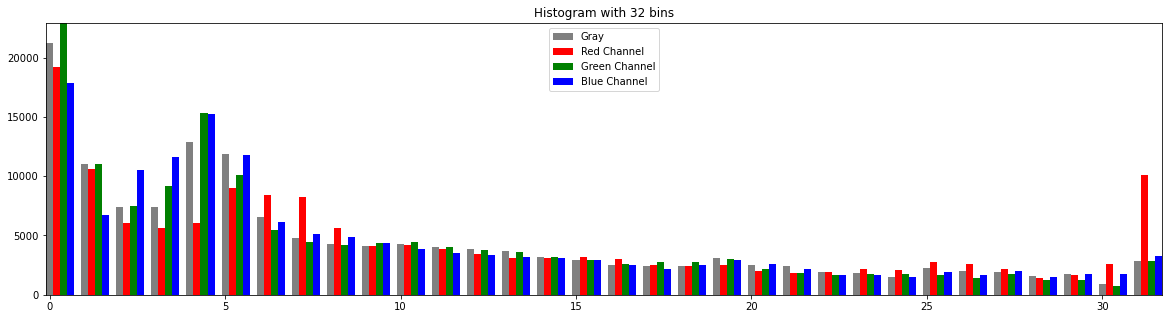

In [3]:
import skimage 
from skimage import color

"""
Function to display the histogram for the differents RGB channels for the 
specific nbins of the image
img: img to display histogram
nbins: intervals of histogram
"""
def show_histogram(img, nbins, title = None ):
    #Changing image pixels to floats
    img = img.astype(float)
    shape = img.shape
    
    #Histogram for the image
    histogram = skimage.exposure.histogram(img, nbins = nbins)
    

    #Generating graph
    fig=plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    
    #bar width and the range of x values
    num_bars = img.shape[2] if len(img.shape) == 3 else 1
    width = 1/(num_bars+1)
    x_range = np.arange(len(histogram[1]))
    
    #Get the gray values from the histogram.
    gray_values = skimage.exposure.histogram(color.rgb2gray(img), nbins = nbins)[0]

    #Creating bar graph
    rects = ax.bar(x_range, gray_values, width, color='gray')
    
    #If the image have color channels, get each color and add to the graph
    if len(shape) == 3:
        r_values = skimage.exposure.histogram(img[:,:,0], nbins = nbins)[0]
        g_values = skimage.exposure.histogram(img[:,:,1], nbins = nbins)[0]
        b_values = skimage.exposure.histogram(img[:,:,2], nbins = nbins)[0]
        
        r_rects = ax.bar(x_range + width * 1, r_values, width, color='r')
        g_rects = ax.bar(x_range + width * 2, g_values, width, color='g')
        b_rects = ax.bar(x_range + width * 3, b_values, width, color='b')
    
    #To define the title of the image
    if title is not None: 
        ax.set_title(title)
            
    ax.legend(["Gray", "Red Channel", "Green Channel", "Blue Channel"], loc = "upper center" )
    ax.autoscale(tight=True)
    plt.show()        

#Histogram for 8 intervals
show_histogram(face,8,"Histogram with 8 bins")    

#Histogram for 32 intervals
show_histogram(face,32,"Histogram with 32 bins")    


### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

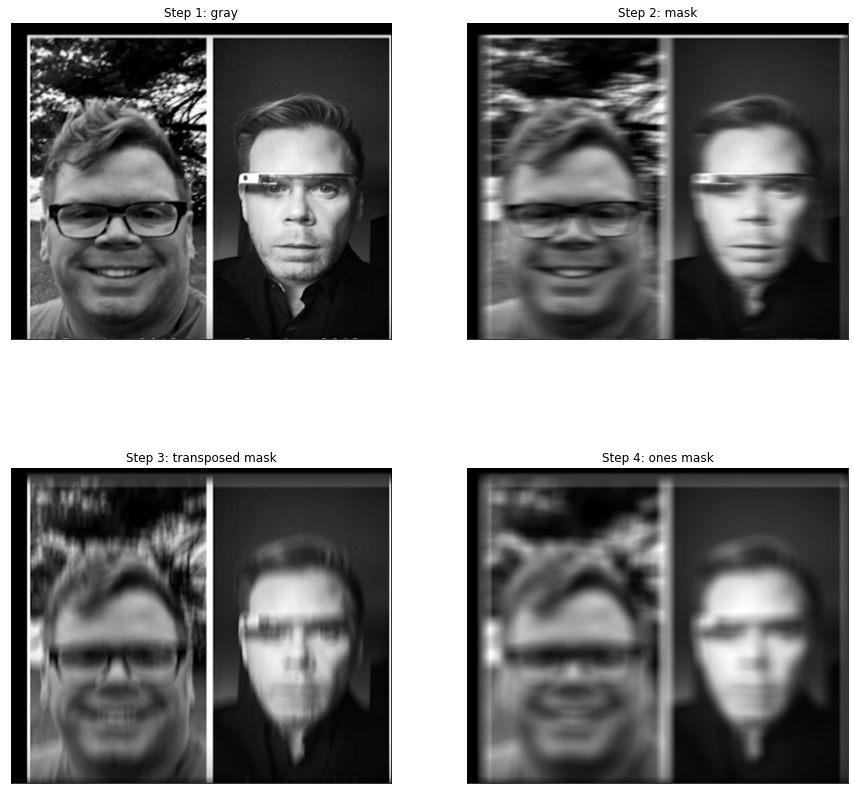

In [4]:
#your solution
from scipy import ndimage

face = io.imread("images/face.png")

# Step 1: Covert it to grayscale
face_gray = color.rgb2gray(face)

# Step 2: Convolve it with a horizontal mask
mask_h1d = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]) 
mask_h1d = mask_h1d/np.sum(mask_h1d) # Normalize the mask
face_convolved_1 = ndimage.convolve(face_gray, mask_h1d, mode='constant', cval=0.0)

# Step 3: Convolve the grayscale image in step 1 with a transposed version of the mask in step 2
mask_2 = np.transpose(mask_h1d) # Transpose the mask (like has been normalized before, now it won't be normalized)
face_convolved_2 = ndimage.convolve(face_gray, mask_2, mode='constant', cval=0.0)

# Step 4: Convolve the grayscale image in step 1 with a uniform two-dimensional mask of dimensions 15x15 with all values set to 1.
mask_3 = np.ones((15,15), dtype=int)
mask_3 = mask_3/np.sum(mask_3) # Normalize the mask
face_convolved_3 = ndimage.convolve(face_gray, mask_3, mode='constant', cval=0.0)

# Visualize them
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.imshow(face_gray, cmap='gray')
plt.title('Step 1: gray')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,2,2)
plt.imshow(face_convolved_1, cmap='gray')
plt.title('Step 2: mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,2,3)
plt.imshow(face_convolved_2, cmap='gray')
plt.title('Step 3: transposed mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,2,4)
plt.imshow(face_convolved_3, cmap='gray')
plt.title('Step 4: ones mask')
plt.xticks([])
plt.yticks([])

plt.show()

Questions

1. Observe and comment how the type and the range of values (max & min) changed when different operations have been applied on the image.
The type has changed when we convert the original image to grayscale, all the images that we convolved are type float because we are operating with the image in gray that also is float type. 
The same for max and min values. When we convert the original image to grayscale, the values pass to be between 0 and 255 in rgb to be between 0 and 1 in grayscale. For extension, the convolved images are between this values. The diference in this values between the differents masks is the max value which is bigger in transposed mask. 

2. Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.
Yes, the type of the mask is important for convolution. 
The mask of step 2 produces that the image turns white.
The mask of step 3 is similar to the result with the gray image.
In the mask of step 4, occurs the same like mask of step 2, has a similar to the result with the gray image but in white. 

255 0 uint8
1.0 0.0 float64
0.9956992941176471 0.0 float64
0.9999999999999999 0.0 float64
0.9438707712418295 0.0 float64
68 17 uint8
255 0 uint8
246 0 uint8


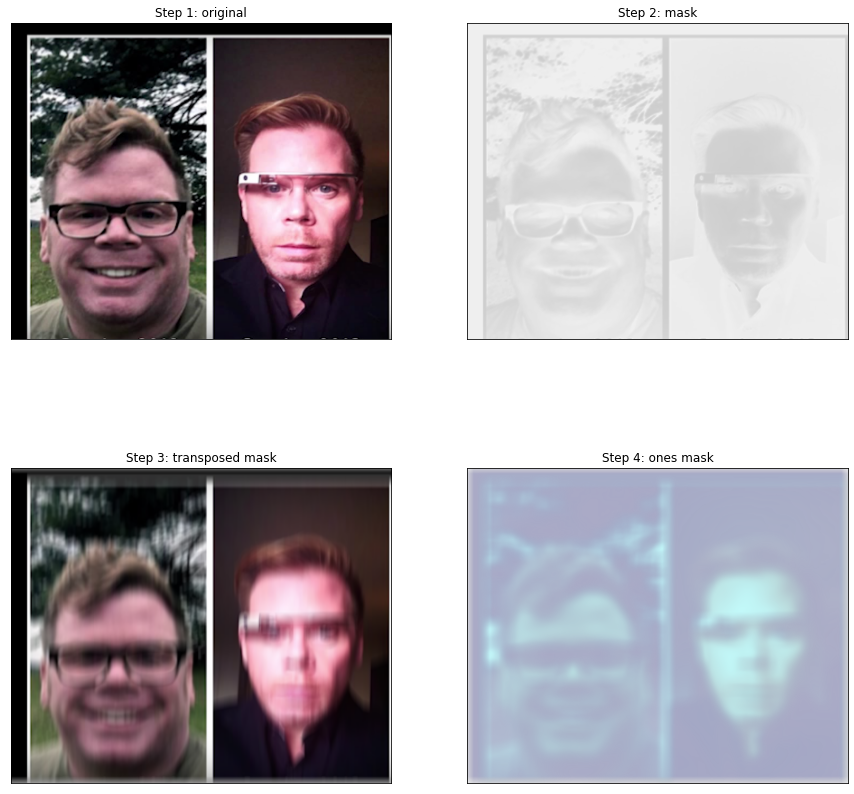

In [9]:
# Questions tests
# 1.
print(face.max(), face.min(), face.dtype)
print(face_gray.max(), face_gray.min(), face_gray.dtype)
print(face_convolved_1.max(), face_convolved_1.min(), face_convolved_1.dtype)
print(face_convolved_2.max(), face_convolved_2.min(), face_convolved_2.dtype)
print(face_convolved_3.max(), face_convolved_3.min(), face_convolved_3.dtype)
# 2.
mask_h1d_original = np.array([[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]]) 
mask_h1d_original = mask_h1d_original/np.sum(mask_h1d_original) # Normalize the mask
face_convolved_1_original = ndimage.convolve(face, mask_h1d_original, mode='constant', cval=0.0)

mask_2_original = np.transpose(mask_h1d_original) # Transpose the mask (like has been normalized before, now it won't be normalized)
face_convolved_2_original = ndimage.convolve(face, mask_2_original, mode='constant', cval=0.0)

mask_3_original = np.ones((15,15,3), dtype=int)
mask_3_original = mask_3_original/np.sum(mask_3_original) # Normalize the mask
face_convolved_3_original = ndimage.convolve(face, mask_3_original, mode='constant', cval=0.0)

print(face_convolved_1_original.max(), face_convolved_1_original.min(), face_convolved_1_original.dtype)
print(face_convolved_2_original.max(), face_convolved_2_original.min(), face_convolved_2_original.dtype)
print(face_convolved_3_original.max(), face_convolved_3_original.min(), face_convolved_3_original.dtype)

# Visualize them
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.imshow(face)
plt.title('Step 1: original')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,2,2)
plt.imshow(face_convolved_1_original)
plt.title('Step 2: mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,2,3)
plt.imshow(face_convolved_2_original)
plt.title('Step 3: transposed mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,2,4)
plt.imshow(face_convolved_3_original)
plt.title('Step 4: ones mask')
plt.xticks([])
plt.yticks([])

plt.show()

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

#your solution
The difference is that the first code only convert the type of the image's values to float without changing them (the values are between 255 and 0), instead in the second code convert the image's values to float and change them so that are between 0 and 1 (the same that in grayscale).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255.0 0.0
1.0 0.0


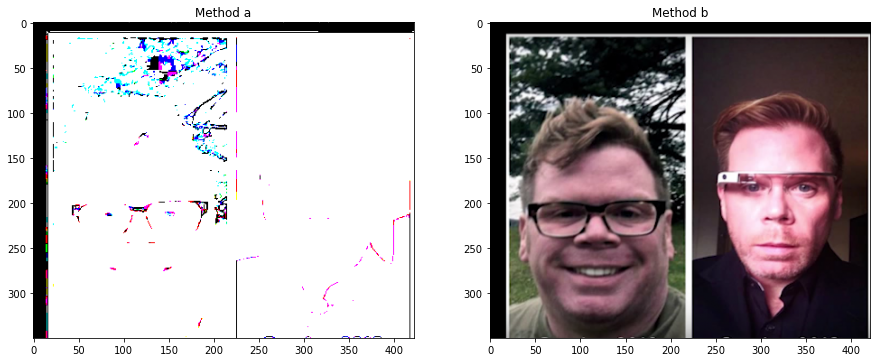

In [11]:
# tests to answer the question b)
from skimage import img_as_float

fig=plt.figure(figsize=(15,15))

im_2a=np.array(face, dtype='float')

fig.add_subplot(1,2,1)
plt.imshow(im_2a)
plt.title('Method a')

print(im_2a.max(), im_2a.min())

im_2b=np.array(face)
im_2b=img_as_float(im_2b)
fig.add_subplot(1,2,2)
plt.imshow(im_2b)
plt.title('Method b')
print(im_2b.max(), im_2b.min())
plt.show()

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?
Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

255 255


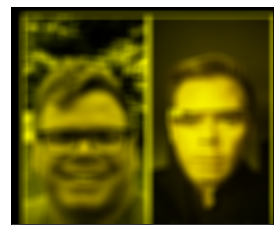

In [29]:
#your solution
from skimage.transform import rescale

def convolve_RGB_image(img):
    # 15x15 uniform mask 
    mask = np.ones((15,15,3))
    mask = mask/np.sum(mask) # Normalize the mask
    # we create a new array of 0s where add the convolved channels
    convolved_image = np.zeros(img.shape, dtype = "uint8")
    # add the convolved channels
    convolved_image[...,:2] = ndimage.convolve(img[...,:2], mask)
    convolved_image[...,3] = img[...,3]
    print(convolved_image.max(), img.max())
    # visualize it
    plt.xticks([])
    plt.yticks([])
    plt.imshow(convolved_image,vmin=0,vmax=255)
    plt.show()

convolve_RGB_image(face)

# Which is the result obtained when applying a single-channel filter channel by channel separately?

# In this function doesn't work because we take for granted that the dimensions will be 3.

# Test: convolve_RGB_image(face_gray)


### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms after applying the 15x15 convolution of the previous exercise.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


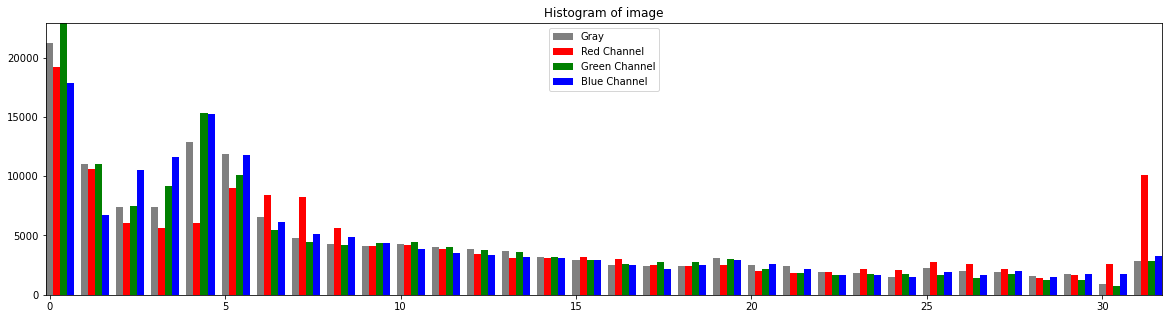

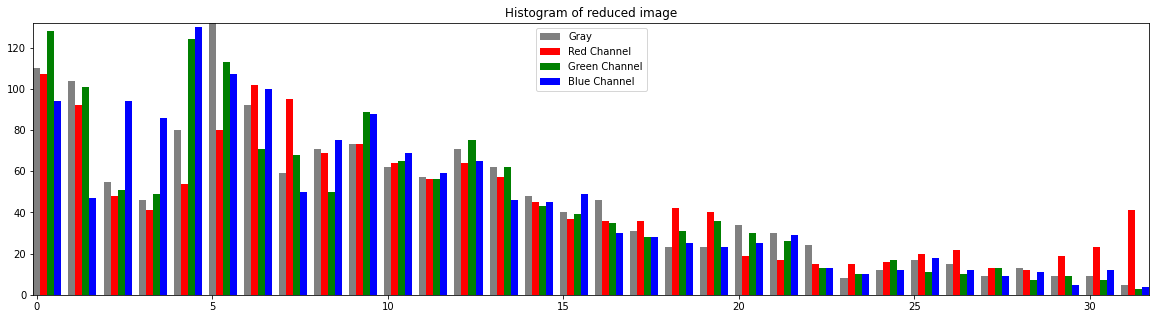

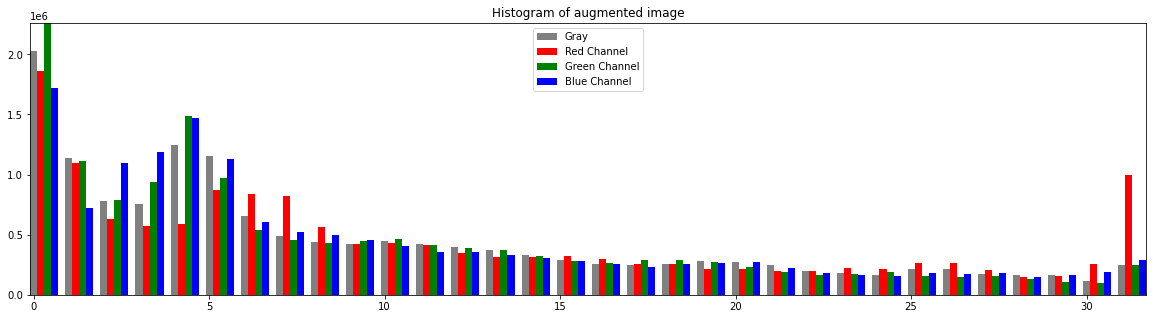

In [14]:
from skimage.transform import resize

#Resize the image 1/10 times of the original
face_reduced = resize(face,(face.shape[0]//10, face.shape[1]//10, face.shape[2]))
#Resize the image 10 times of the original
face_augmented = resize(face,(face.shape[0]*10, face.shape[1]*10, face.shape[2]))

show_histogram(face,32,"Histogram of image")
show_histogram(face_reduced,32,"Histogram of reduced image")
show_histogram(face_augmented,32,"Histogram of augmented image")


b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

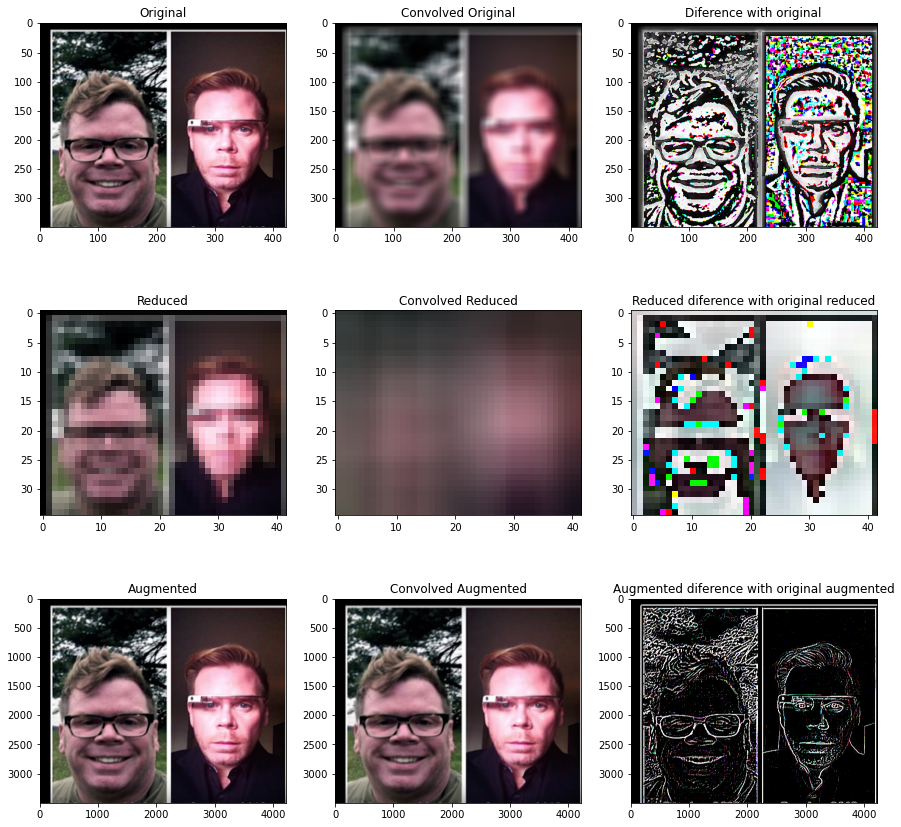

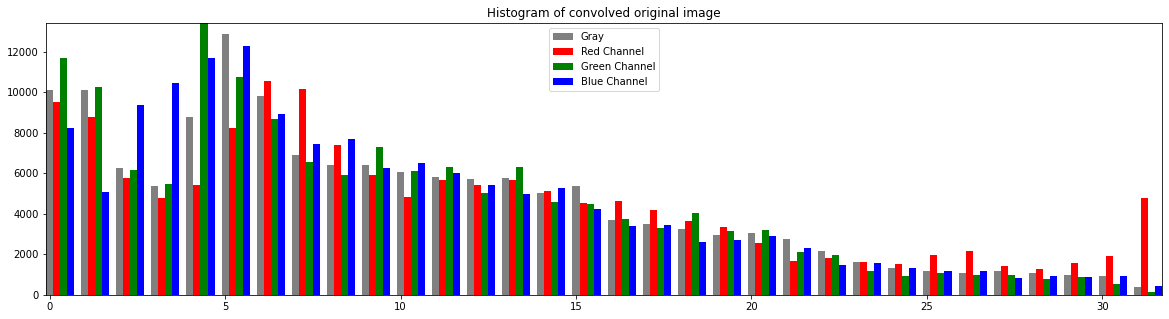

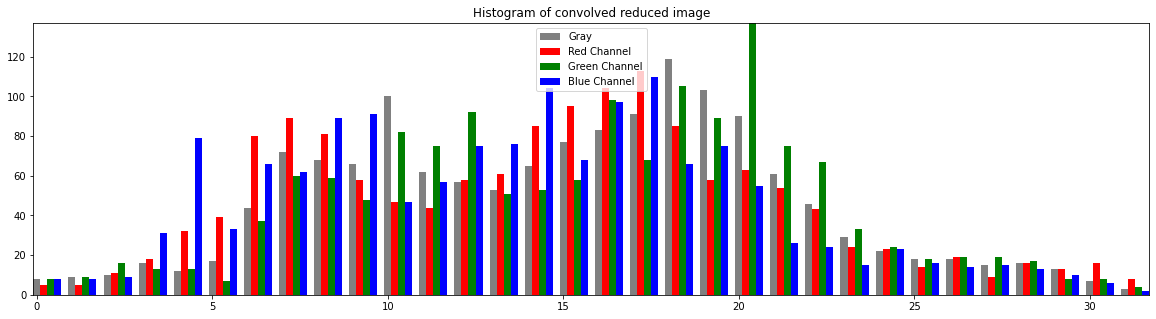

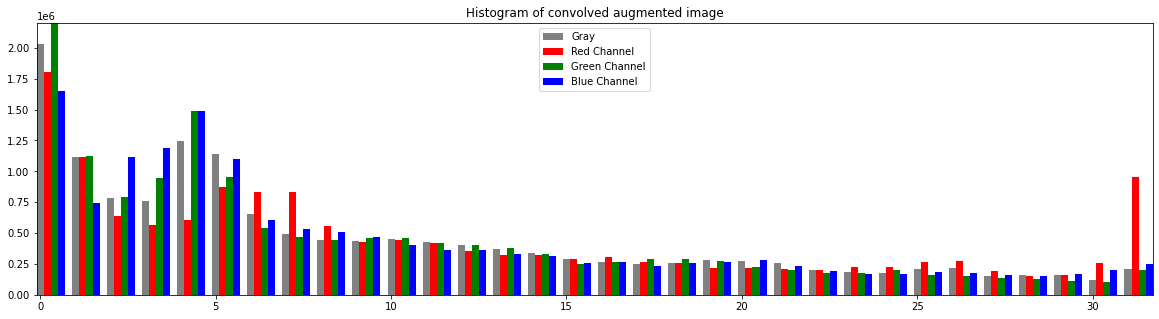

In [15]:
from scipy.ndimage import convolve
from skimage import img_as_ubyte

#Two dimensional mask
convolution_mask = np.ones((15,15,1)) /(15**2)

#Converts the float to uint8 
face_augmented = img_as_ubyte(face_augmented)
face_reduced = img_as_ubyte(face_reduced)

#Convolve original image
convolved_original = convolve(face, convolution_mask)
dif_original =convolved_original-face    

#Convolve reduced image
convolved_reduced = convolve(face_reduced, convolution_mask)
dif_reduced = face_reduced- convolved_reduced 
dif_reduced[...,3] = 255 #Force the intensity to see the image

#Convolve augmented image
convolved_augmented = convolve(face_augmented, convolution_mask)
dif_augmented =face_augmented - convolved_augmented  
dif_augmented[...,3] = 255 #Force the intensity to see the image

fig=plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.imshow(face, vmin = 0, vmax = 255)
plt.title('Original')

fig.add_subplot(3,3,2)
plt.imshow(convolved_original,vmin = 0, vmax = 255)
plt.title('Convolved Original')

fig.add_subplot(3,3,3)
plt.imshow(dif_original, vmin = 0, vmax = 255)
plt.title('Diference with original')


fig.add_subplot(3,3,4)
plt.imshow(face_reduced, vmin = 0, vmax = 255)
plt.title('Reduced')

fig.add_subplot(3,3,5)
plt.imshow(convolved_reduced,vmin = 0, vmax = 255)
plt.title('Convolved Reduced')

fig.add_subplot(3,3,6)
plt.imshow(dif_reduced, vmin = 0, vmax = 255)
plt.title('Reduced diference with original reduced')


fig.add_subplot(3,3,7)
plt.imshow(face_augmented, vmin = 0, vmax = 255)
plt.title('Augmented')

fig.add_subplot(3,3,8)
plt.imshow(convolved_augmented,vmin = 0, vmax = 255)
plt.title('Convolved Augmented')

fig.add_subplot(3,3,9)
plt.imshow(dif_augmented, vmin = 0, vmax = 255)
plt.title('Augmented diference with original augmented')


plt.show()

show_histogram(convolved_original,32,"Histogram of convolved original image")
show_histogram(convolved_reduced,32,"Histogram of convolved reduced image")
show_histogram(convolved_augmented,32,"Histogram of convolved augmented image")


### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


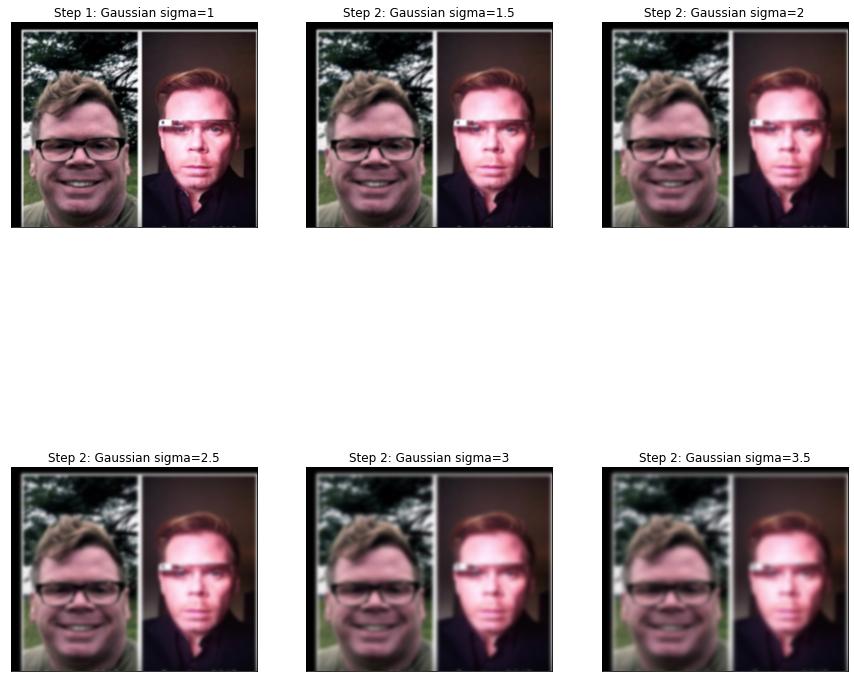

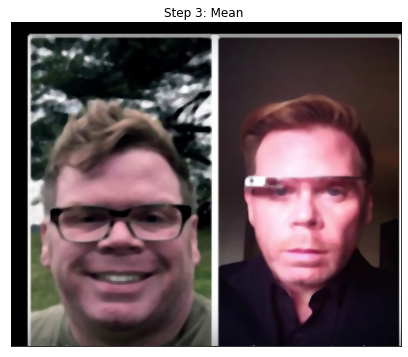

In [25]:
#your solution
from skimage import filters
from skimage.morphology import disk

face = io.imread("images/face.png")

# Step 1: Gaussian kernel with sigma = 1
gaussian_kernel_1 = filters.gaussian(face, 1,multichannel = True)

# Step 2: Gaussian kernel with a different sigma value.
gaussian_kernel_15 = filters.gaussian(face, 1.5,multichannel = True)
gaussian_kernel_2 = filters.gaussian(face, 2,multichannel = True)
gaussian_kernel_25 = filters.gaussian(face, 2.5,multichannel = True)
gaussian_kernel_3 = filters.gaussian(face, 3,multichannel = True)
gaussian_kernel_35 = filters.gaussian(face, 3.5,multichannel = True)

# Which is the most adequate value for keeping the main objects and structures of the image?
# 2.5 is the value whick keeps the main objects of the image, it's the point where the difference is noticeable.

# Step 3: Median filter.
from skimage.filters import median
from skimage.color.adapt_rgb import adapt_rgb, each_channel
@adapt_rgb(each_channel)
def median_each(im, size):
    return median(im, disk(size))

gr_noisy_median=median_each(face,3)

# Visualize it
fig=plt.figure(figsize=(15,15))

fig.add_subplot(2,3,1)
plt.imshow(gaussian_kernel_1, cmap='gray')
plt.title('Step 1: Gaussian sigma=1')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,3,2)
plt.imshow(gaussian_kernel_15, cmap='gray')
plt.title('Step 2: Gaussian sigma=1.5')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,3,3)
plt.imshow(gaussian_kernel_2, cmap='gray')
plt.title('Step 2: Gaussian sigma=2')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,3,4)
plt.imshow(gaussian_kernel_25, cmap='gray')
plt.title('Step 2: Gaussian sigma=2.5')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,3,5)
plt.imshow(gaussian_kernel_3, cmap='gray')
plt.title('Step 2: Gaussian sigma=3')
plt.xticks([])
plt.yticks([])

fig.add_subplot(2,3,6)
plt.imshow(gaussian_kernel_35, cmap='gray')
plt.title('Step 2: Gaussian sigma=3.5')
plt.xticks([])
plt.yticks([])

# Visualize it
fig=plt.figure(figsize=(7,7))

fig.add_subplot(1,1,1)
plt.imshow(gr_noisy_median, cmap='gray')
plt.title('Step 3: Mean ')
plt.xticks([])
plt.yticks([])
plt.show()

# Comment the effect of using different kinds of filters on the original image.

# Using gaussian, every time we increase the sigma it looks more blurry, instead 
# in the mean_filter it averages the sigmas and makes it not look so blurry.

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [9]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [10]:
from skimage.feature import canny
from skimage import filters
from skimage.color import rgb2gray

def detectingEdges(img):
    
    img = rgb2gray(img) #The image must be gray
    #Roberts filter
    img_roberts = filters.roberts(img)
    
    #Prewitt filter
    img_prewitt = filters.prewitt(img)
    
    #Sobel filter
    img_sobel = filters.sobel(img)
    
    #Canny filter
    img_canny = canny(img)
    
    #Adding original image
    fig0=plt.figure(figsize=(20,5))

    fig0.add_subplot(1,1,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Original')

    #Adding the image with filters
    fig=plt.figure(figsize=(10,10))

    fig.add_subplot(2,2,1)
    plt.imshow(img_roberts,cmap = 'gray')
    plt.title('Roberts filter')

    fig.add_subplot(2,2,2)
    plt.imshow(img_prewitt,cmap = 'gray')
    plt.title('Prewitt filter')
    
    fig.add_subplot(2,2,3)
    plt.imshow(img_sobel,cmap = 'gray')
    plt.title('Sobel filter')
    
    fig.add_subplot(2,2,4)
    plt.imshow(img_canny,cmap = 'gray')
    plt.title('Canny filter')
    
    plt.show()

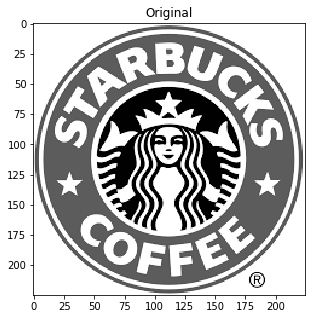

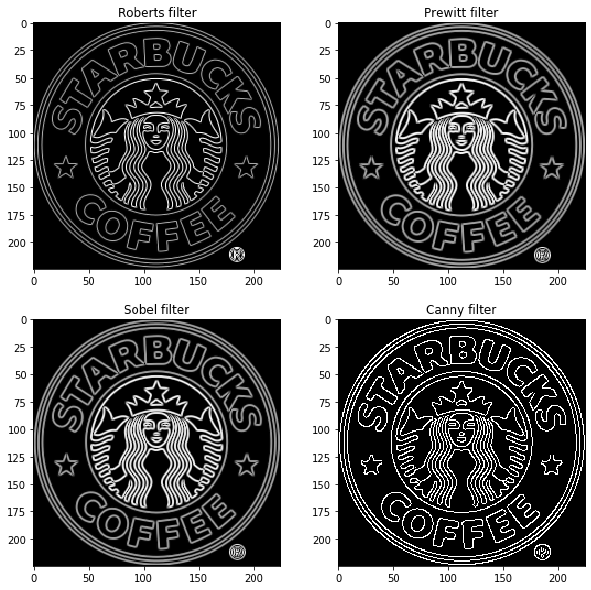

In [11]:

logo = io.imread("images/logo.png")
detectingEdges(logo)

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

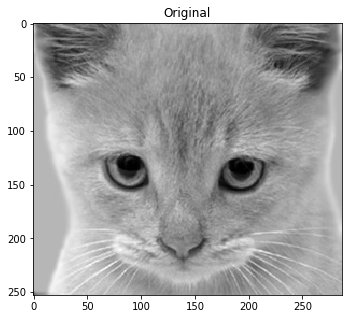

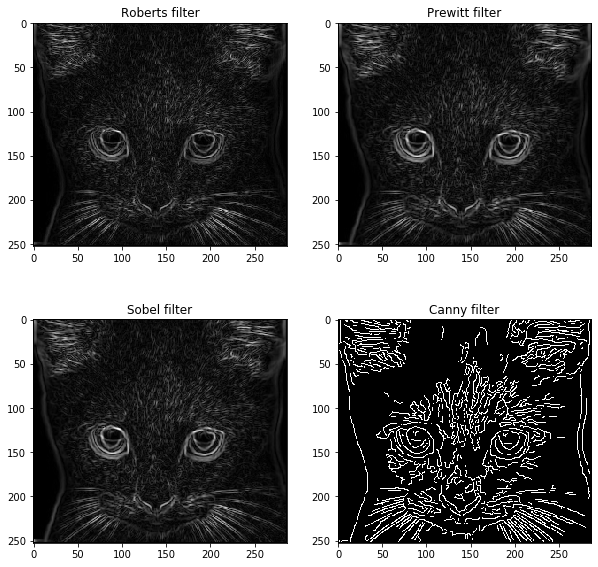

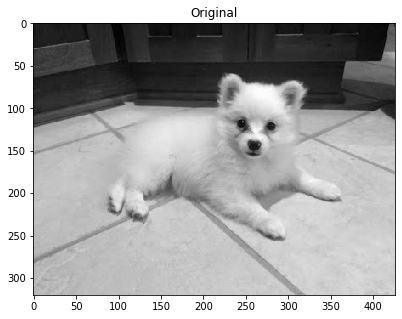

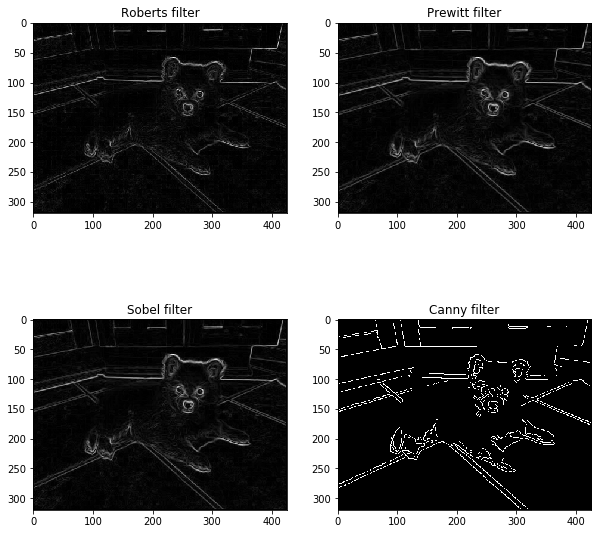

In [12]:
from skimage.color import rgb2gray

logo = io.imread("images/cat.jpg")
detectingEdges(logo)

logo = io.imread("images/dog.jpg")
detectingEdges(logo)

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [13]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

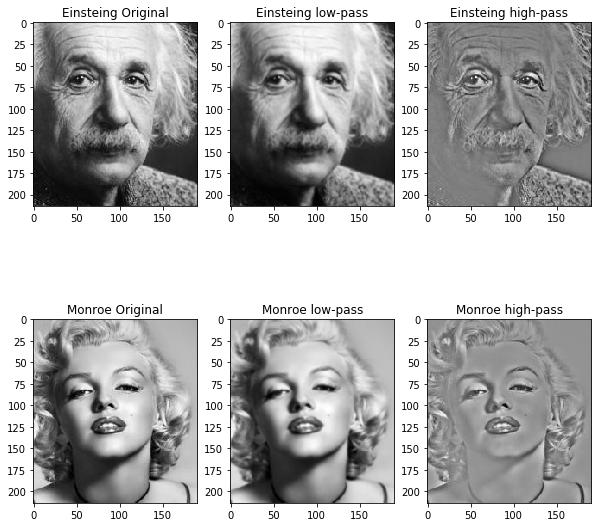

In [14]:
from skimage import img_as_float
from skimage.filters import gaussian

# Get image and convert to float
einstein = io.imread("images/Einstein.jpg")
einstein = img_as_float(einstein)
#Applying low and high pass for einstein
lowEinstein = gaussian(einstein,0.75)
highEinstein = einstein - gaussian(einstein,5)


monroe = io.imread("images/monroe.jpg")
monroe = img_as_float(monroe)
#Applying low and high pass for monroe
lowMonroe = gaussian(monroe,0.75)
highMonroe = monroe - gaussian(monroe,5)



fig=plt.figure(figsize=(10,10))

fig.add_subplot(2,3,1)
plt.imshow(einstein,cmap = 'gray')
plt.title('Einsteing Original')

fig.add_subplot(2,3,2)
plt.imshow(lowEinstein,cmap = 'gray')
plt.title('Einsteing low-pass')
    
fig.add_subplot(2,3,3)
plt.imshow(highEinstein,cmap = 'gray')
plt.title('Einsteing high-pass')

fig.add_subplot(2,3,4)
plt.imshow(monroe,cmap = 'gray')
plt.title('Monroe Original')

fig.add_subplot(2,3,5)
plt.imshow(lowMonroe,cmap = 'gray')
plt.title('Monroe low-pass')
    
fig.add_subplot(2,3,6)
plt.imshow(highMonroe,cmap = 'gray')
plt.title('Monroe high-pass')



plt.show()

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

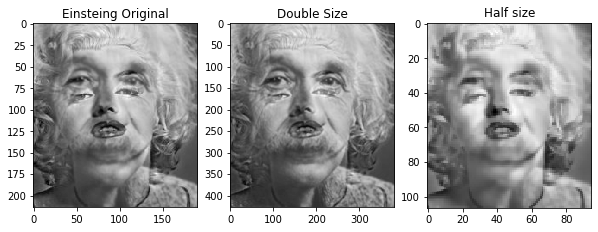

In [15]:
from skimage.transform import resize

def hybridImage(img1,img2,shape = None):
    #Resize the images for the rescale
    if shape is not None:
        img1 = resize(img1, shape)
        img2 = resize(img2, shape)
    low_pass_img = gaussian(img1,0.75) #Low gaussian filter 
    high_pass_img = img2 - gaussian(img2,5) #High gaussian filter 

    return (low_pass_img,high_pass_img)

#Join both image
hybrid = lowEinstein + highMonroe

#Hybrid images with diferent size: 2 times larger
hybridDouble = hybridImage(einstein, monroe, [2*i for i in lowEinstein.shape])
hybridDouble = hybridDouble[0] + hybridDouble[1]
#Hybrid images with diferent size: 2 times half
hybridHalf = hybridImage(einstein, monroe, [i//2 for i in lowEinstein.shape])
hybridHalf = hybridHalf[0] + hybridHalf[1]


fig=plt.figure(figsize=(10,10))

fig.add_subplot(1,3,1)
plt.imshow(hybrid,cmap = 'gray')
plt.title('Einsteing Original')

fig.add_subplot(1,3,2)
plt.imshow(hybridDouble,cmap = 'gray')
plt.title('Double Size')

fig.add_subplot(1,3,3)
plt.imshow(hybridHalf,cmap = 'gray')
plt.title('Half size')

plt.show()

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

In [16]:
#your solution

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

<IPython.core.display.Javascript object>


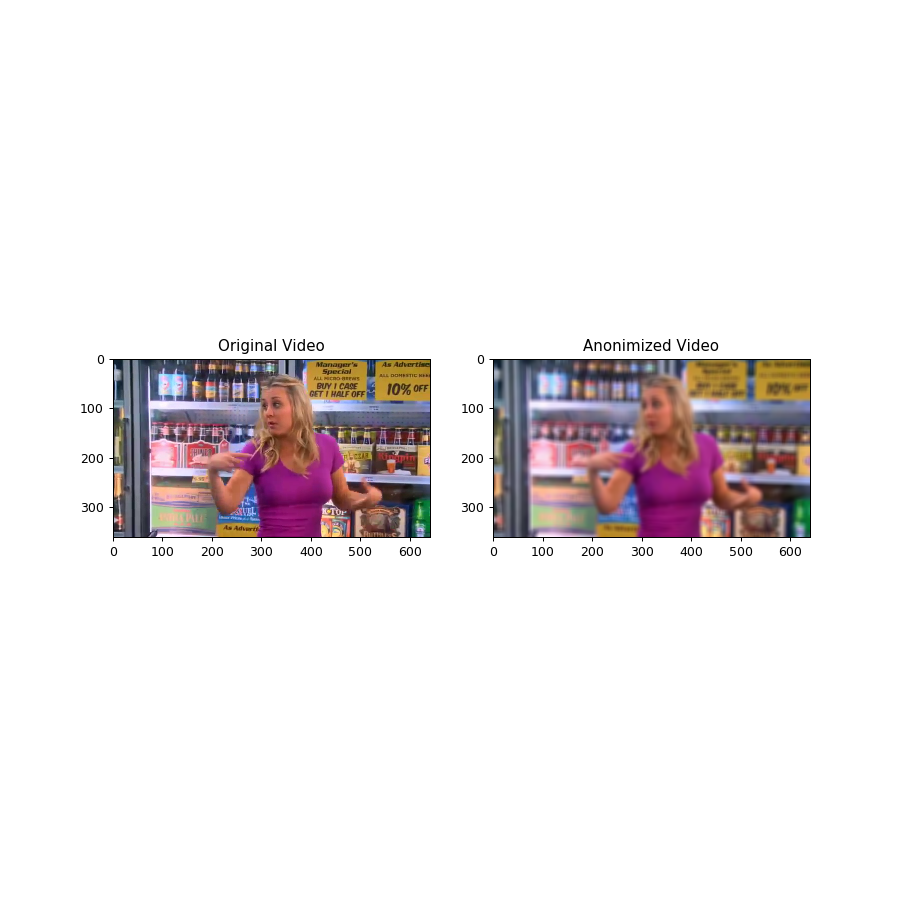

In [20]:
%matplotlib nbagg
from scipy.ndimage import convolve
from matplotlib import animation

#Collection of all the images of the video
video = io.collection.ImageCollection("images/bigbangcollection/frame*.png")

#Creating the figure to display images
fig,ax =plt.subplots(1,2, figsize=(10,10))

ax[0].set_title("Original Video")
ax[1].set_title("Anonimized Video")


#Convluted mask
mask = np.ones((10,10,1))/(10**2)

#Function that animate the original and the convoluted video.
def ani(i):
    ax[0].imshow(video[i])
    ax[1].imshow(convolve(video[i],mask))


fps = 24 #FPS

#Create the animation through the figure display and calling repeatedly the function ani
#The repeat paramater need to be False or the kernel dies
ani = animation.FuncAnimation(fig, ani, frames=len(video), interval = 1000/fps,repeat = False)

plt.show()

